Importing Necessary Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import requests
from bs4 import BeautifulSoup

Importing Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data exploration

###Checking for any Missing Values



In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine the data types of each column
print("\nData Types of each column:")
print(df.dtypes)

# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values Summary:")
display(missing_summary)

# Display the first 10 rows
print("\nFirst 10 rows of the DataFrame:")
display(df.head(10))

Shape of the DataFrame: (1594, 83)

Data Types of each column:
connector                    object
player_id                    object
game_id                      object
home_team                    object
away_team                    object
                             ...   
Away_latitude               float64
Away_longitude              float64
distance_miles              float64
HOME_day_since_last_game      int64
AWAY_day_since_last_game      int64
Length: 83, dtype: object

Missing Values Summary:


,Missing Values,Percentage
connector,0,0.0
player_id,0,0.0
game_id,0,0.0
home_team,0,0.0
away_team,0,0.0
...,...,...
Away_latitude,0,0.0
Away_longitude,0,0.0
distance_miles,0,0.0
HOME_day_since_last_game,0,0.0



First 10 rows of the DataFrame:


,connector,player_id,game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,Avg_Wind_MPH,Avg_Humidity_Percent,Avg_Percipitation_Prob_Percent,Home_latitude,Home_longitude,Away_latitude,Away_longitude,distance_miles,HOME_day_since_last_game,AWAY_day_since_last_game
0,2019_01_ATL_MIN_Alexander,2019_MIN_20_Alexander,2019_01_ATL_MIN,MIN,ATL,REG,1,ATL,away,MIN,...,3.50,91.25,26.75,44.9746,-93.2598,33.7551,-84.4010,906.980256,0,0
1,2019_01_ATL_MIN_Gage,2019_ATL_83_Gage,2019_01_ATL_MIN,MIN,ATL,REG,1,ATL,away,MIN,...,3.50,91.25,26.75,44.9746,-93.2598,33.7551,-84.4010,906.980256,0,0
2,2019_01_ATL_MIN_McKinley,2019_ATL_98_McKinley,2019_01_ATL_MIN,MIN,ATL,REG,1,MIN,home,ATL,...,3.50,91.25,26.75,44.9746,-93.2598,33.7551,-84.4010,906.980256,0,0
3,2019_01_BAL_MIA_McCain,2019_MIA_28_McCain,2019_01_BAL_MIA,MIA,BAL,REG,1,BAL,away,MIA,...,7.75,65.00,0.00,25.9579,-80.2388,39.3972,-76.8352,949.274391,0,0
4,2019_01_BAL_MIA_McMillan,2019_MIA_52_McMillan,2019_01_BAL_MIA,MIA,BAL,REG,1,MIA,home,BAL,...,7.75,65.00,0.00,25.9579,-80.2388,39.3972,-76.8352,949.274391,0,0
5,2019_01_BAL_MIA_Smith,2019_BAL_22_Smith,2019_01_BAL_MIA,MIA,BAL,REG,1,MIA,home,BAL,...,7.75,65.00,0.00,25.9579,-80.2388,39.3972,-76.8352,949.274391,0,0
6,2019_01_BUF_NYJ_Enunwa,2019_NYJ_81_Enunwa,2019_01_BUF_NYJ,NYJ,BUF,REG,1,NYJ,home,BUF,...,4.00,48.25,0.00,40.8137,-74.0829,42.7738,-78.7875,277.575071,0,0
7,2019_01_BUF_NYJ_Poole,2019_NYJ_34_Poole,2019_01_BUF_NYJ,NYJ,BUF,REG,1,BUF,away,NYJ,...,4.00,48.25,0.00,40.8137,-74.0829,42.7738,-78.7875,277.575071,0,0
8,2019_01_CIN_SEA_Amadi,2019_SEA_28_Amadi,2019_01_CIN_SEA,SEA,CIN,REG,1,CIN,away,SEA,...,4.25,70.75,25.00,47.5932,-122.3318,39.0964,-84.5164,1966.864410,0,0
9,2019_01_CIN_SEA_Britt,2019_SEA_68_Britt,2019_01_CIN_SEA,SEA,CIN,REG,1,SEA,home,CIN,...,4.25,70.75,25.00,47.5932,-122.3318,39.0964,-84.5164,1966.864410,0,0


#Pie Chart of Injuries by Position

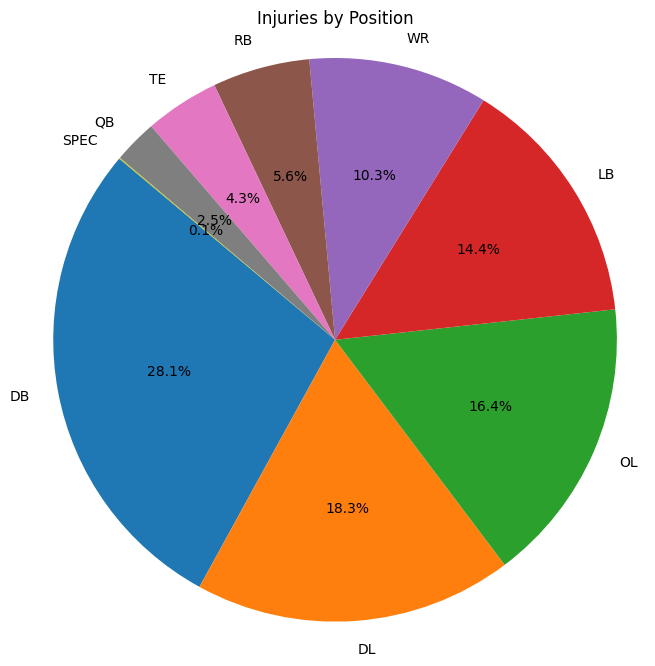

In [ ]:
import matplotlib.pyplot as plt

# Counting the number of occurrences of each position
position_counts = df['position'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Injuries by Position')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

#Line Chart of Injuries by Week

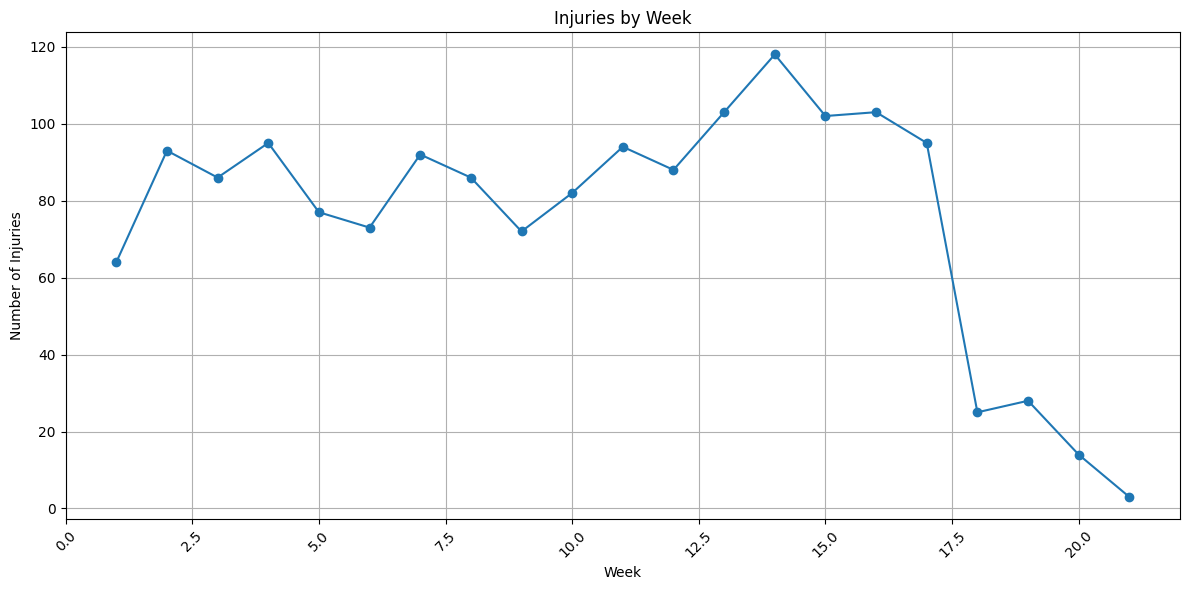

In [ ]:
# ensuring missing values dropped
df_week = df.dropna(subset=['week'])
injuries_by_week = df_week['week'].value_counts().sort_index()

# plotting line chart
plt.figure(figsize=(12, 6))
plt.plot(injuries_by_week.index, injuries_by_week.values, marker='o', linestyle='-')
plt.title('Injuries by Week')
plt.xlabel('Week')
plt.ylabel('Number of Injuries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Bar Chart of Number of Injuries by Team

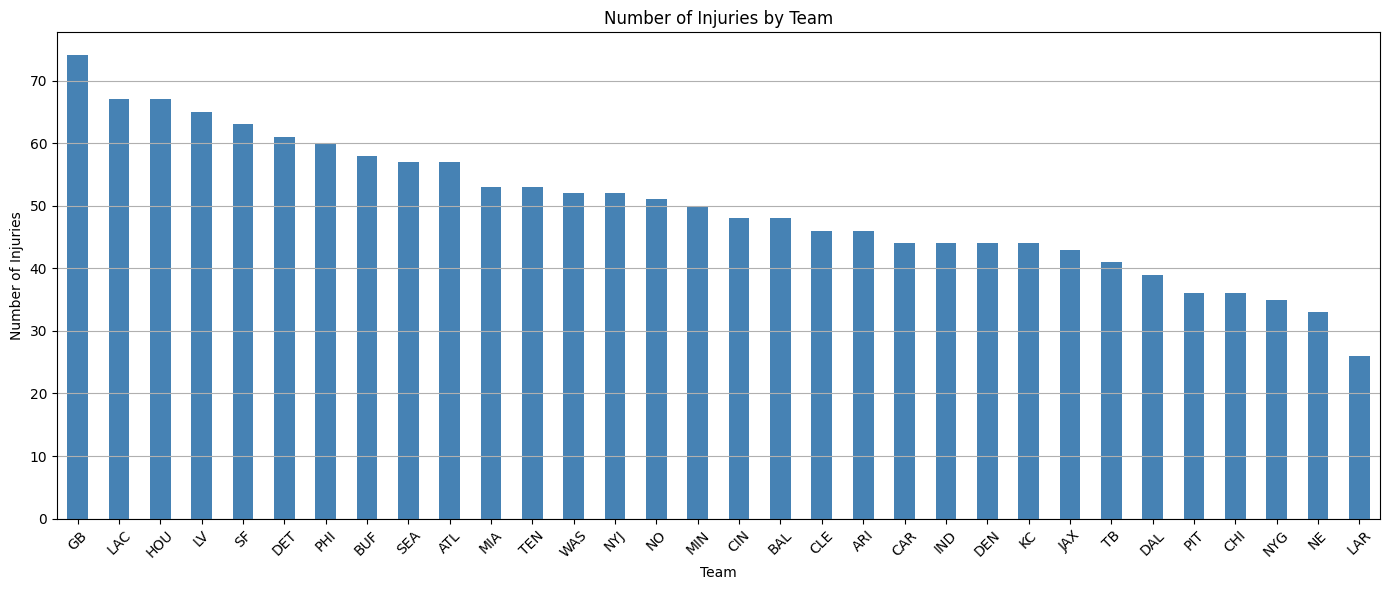

In [ ]:
# checking for missing values
injuries_by_team = df['injured_team'].value_counts().sort_values(ascending=False)

# plotting the bar chart
plt.figure(figsize=(14, 6))
injuries_by_team.plot(kind='bar', color='steelblue')
plt.title('Number of Injuries by Team')
plt.xlabel('Team')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

#Changing Contact (1) and Noncontact (0)

In [ ]:
import pandas as pd

# Loading the dataset
df = pd.read_excel('/content/football_injury.xlsx')

# Step 1: Cleaning the 'contact / non_contact' column
# Only keep rows that have 'contact' or 'non contact'
df_clean = df[df['Contact/ non-contact'].isin(['contact', 'non contact'])].copy()

# Step 2: Mapping 'contact' -> 1 and 'non contact' -> 0
contact_mapping = {'contact': 1, 'non contact': 0}
df_clean['injury_type'] = df_clean['Contact/ non-contact'].map(contact_mapping)

# Step 3: Dropping the old 'contact / non_contact' column to prevent confusion
df_clean = df_clean.drop(columns=['Contact/ non-contact'])

# Step 4: Print to ensure right results
print(df_clean[['injury_type']].head(10))


    injury_type
0             1
1             1
2             1
3             1
5             1
6             1
7             0
8             1
9             1
10            1


# Random Forest of Contact v. Non-contact

<ipython-input-5-5ded25d138d6>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['height', 'weight', 'years_exp']] = scaler.fit_transform(X[['height', 'weight', 'years_exp']])



Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.07      0.11        43
           1       0.86      0.96      0.91       265

    accuracy                           0.83       308
   macro avg       0.54      0.51      0.51       308
weighted avg       0.77      0.83      0.80       308


Confusion Matrix:


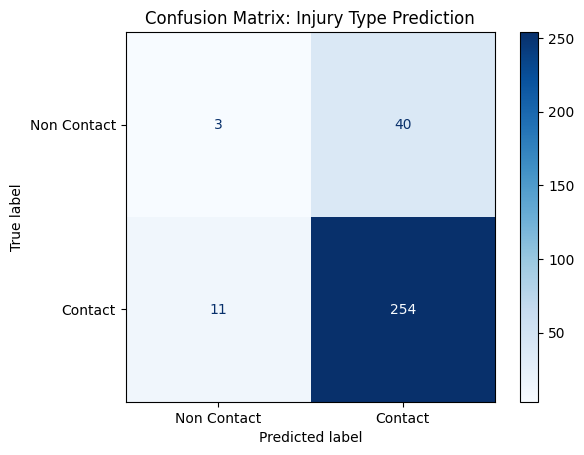


ROC AUC Score: 0.5212373848179026


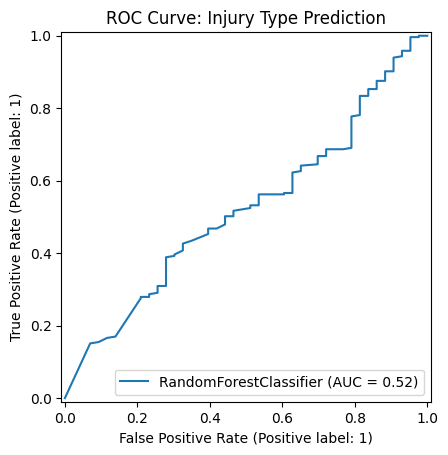

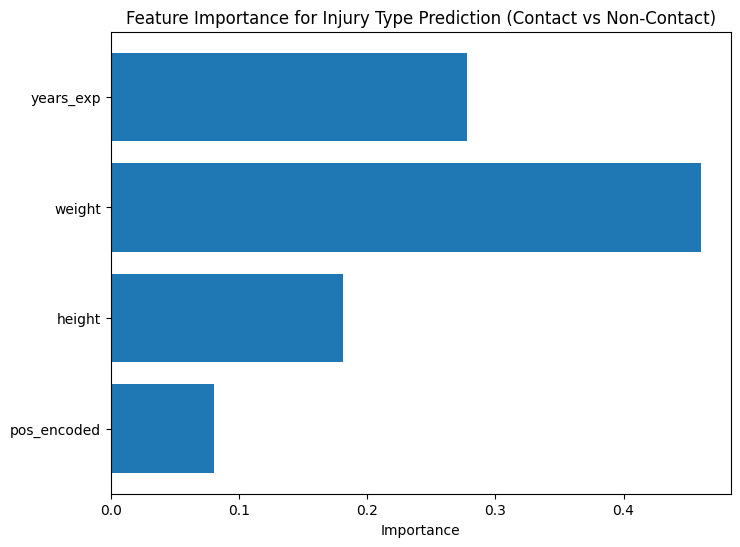

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

# ----------------- Load and Clean the Data -----------------

# Loading the file
file_path = '/content/football_injury.xlsx'
df = pd.read_excel(file_path)

# Keep only rows that are contact or non contact
df_clean = df[df['Contact/ non-contact'].isin(['contact', 'non contact'])].copy()

# Mapping contact to 1, non contact to 0, creating new column 'injury_type'
contact_mapping = {'contact': 1, 'non contact': 0}
df_clean['injury_type'] = df_clean['Contact/ non-contact'].map(contact_mapping)

# Drop the original column
df_clean = df_clean.drop(columns=['Contact/ non-contact'])

# Reseting the indexes
df_clean = df_clean.reset_index(drop=True)

# ----------------- Prepare Features and Target -----------------

# Features
features = ['position', 'height', 'weight', 'years_exp']
target = 'injury_type'

# Drop rows with missing important values
df_clean = df_clean.dropna(subset=features + [target])

# Encode position as numbers
le_pos = LabelEncoder()
df_clean['pos_encoded'] = le_pos.fit_transform(df_clean['position'])

# Final X and y
X = df_clean[['pos_encoded', 'height', 'weight', 'years_exp']]
y = df_clean[target]

# Standardize numerical features
scaler = StandardScaler()
X[['height', 'weight', 'years_exp']] = scaler.fit_transform(X[['height', 'weight', 'years_exp']])

# ----------------- Train-Test Split -----------------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ----------------- Train the Model -----------------

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ----------------- Evaluate the Model -----------------

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Contact', 'Contact'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Injury Type Prediction')
plt.show()

print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

# ----------------- Plot ROC Curve -----------------

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve: Injury Type Prediction')
plt.show()

# ----------------- Feature Importance -----------------

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("Feature Importance for Injury Type Prediction (Contact vs Non-Contact)")
plt.show()


# Encoding Position

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 1. Encoder
le_pos = LabelEncoder()
df_clean['pos_encoded'] = le_pos.fit_transform(df_clean['position'])

# 2. Small table comparing them
print(df_clean[['position', 'pos_encoded']].drop_duplicates().sort_values('pos_encoded'))


    position  pos_encoded
0         DB            0
2         DL            1
16        LB            2
8         OL            3
44        QB            4
37        RB            5
922     SPEC            6
29        TE            7
1         WR            8


# K-Folds for Machine Learning


K-Fold Cross-Validation ROC AUC Scores (Random Forest):
[0.62690735 0.58524333 0.57782941 0.59021053 0.58232244]

Average ROC AUC Score across folds: 0.5925026104541578


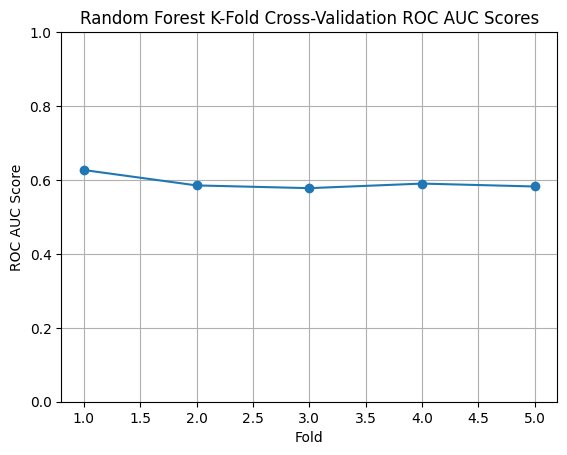

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='roc_auc')

# Results
print("\nK-Fold Cross-Validation ROC AUC Scores (Random Forest):")
print(cv_scores)

print("\nAverage ROC AUC Score across folds:", np.mean(cv_scores))

# --------------------- Plot CV Scores ---------------------

plt.plot(range(1, 6), cv_scores, marker='o')
plt.title('Random Forest K-Fold Cross-Validation ROC AUC Scores')
plt.xlabel('Fold')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Logistic Regression


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.86      1.00      0.92       265

    accuracy                           0.86       308
   macro avg       0.43      0.50      0.46       308
weighted avg       0.74      0.86      0.80       308


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


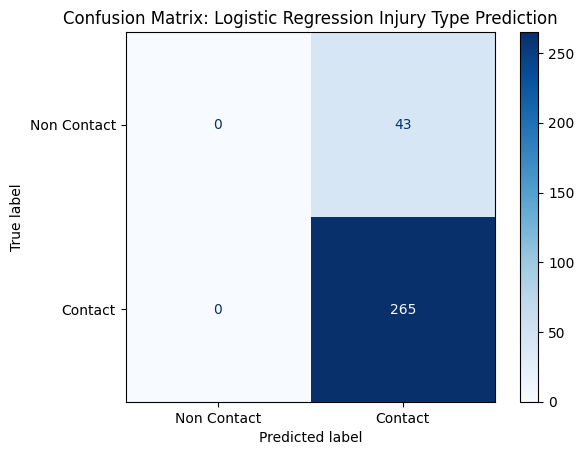


ROC AUC Score: 0.5892496709082932


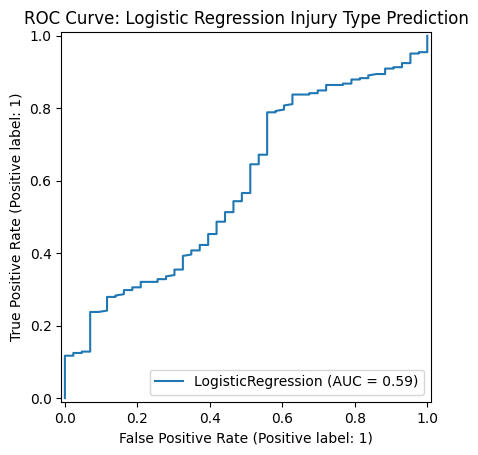

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# ----------------- Evaluate the Model -----------------

y_pred = log_reg_model.predict(X_test)
y_prob = log_reg_model.predict_proba(X_test)[:,1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Contact', 'Contact'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression Injury Type Prediction')
plt.show()

print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

# ----------------- Plot ROC Curve -----------------

RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test)
plt.title('ROC Curve: Logistic Regression Injury Type Prediction')
plt.show()

#K-Means Clustering

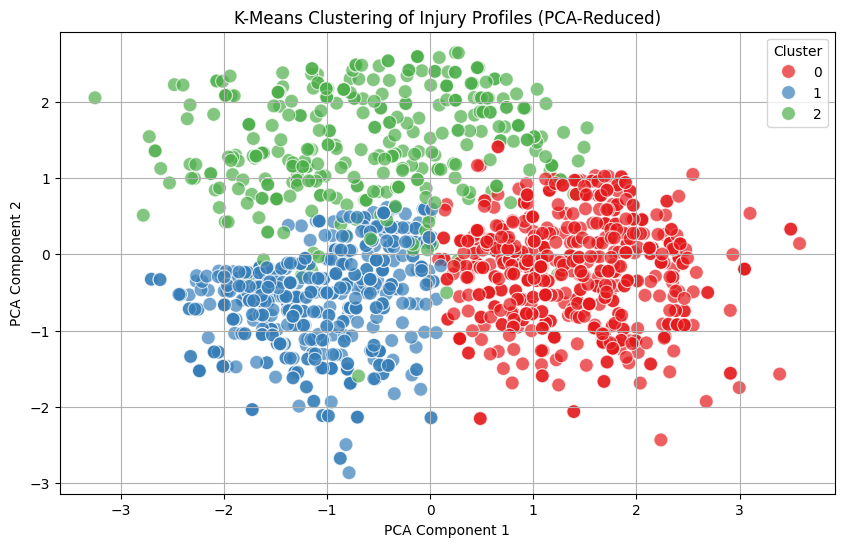

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Drop Unknown rows in both df and X at the same time
df = df.dropna(subset=['position', 'height', 'weight', 'years_exp']).copy()

# build X from the cleaned df
df['pos_encoded'] = LabelEncoder().fit_transform(df['position'])
X = df[['pos_encoded', 'height', 'weight', 'years_exp']]

# Standardize
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Assign PCA back to the cleaned dataframe
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Setting up the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='Set1',
    s=100,
    alpha=0.7
)

# Customizing the plot
plt.title('K-Means Clustering of Injury Profiles (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Decision Tree

<ipython-input-3-eb8198f9a563>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['height', 'weight', 'years_exp']] = StandardScaler().fit_transform(X[['height', 'weight', 'years_exp']])


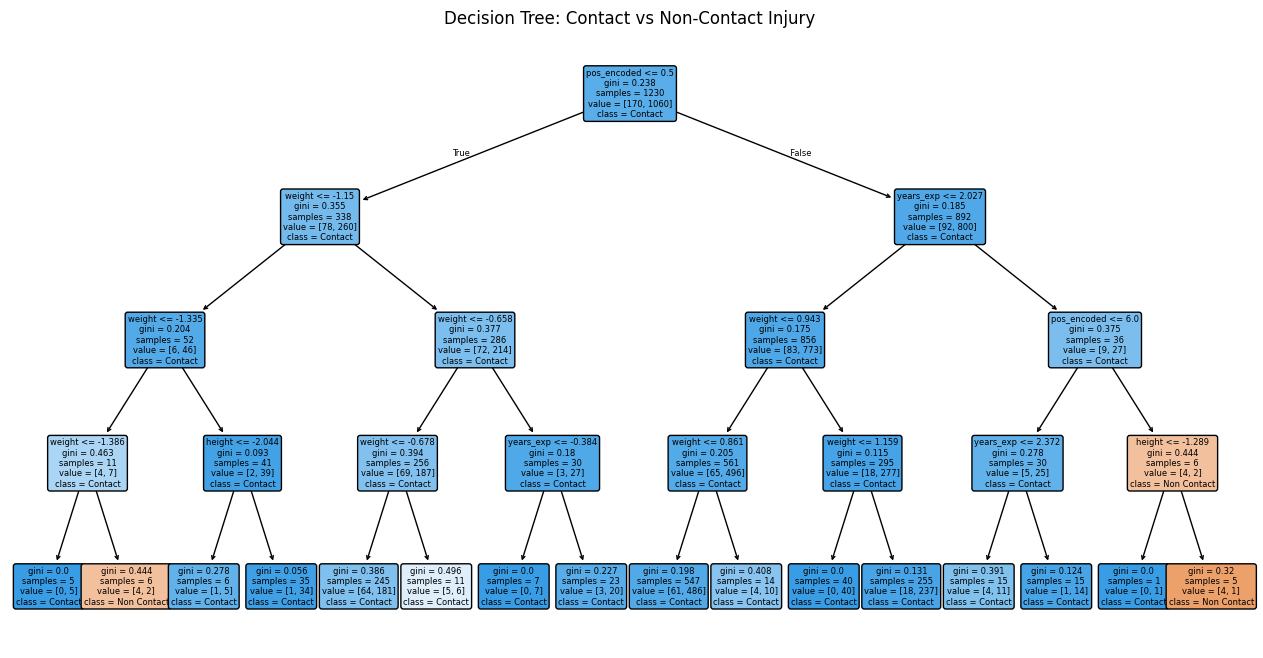

In [ ]:
# STEP 1: Install required libraries
# !pip install pandas matplotlib scikit-learn openpyxl graphviz

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# STEP 3: Load the Excel file
file_path = '/content/football_injury.xlsx'
df = pd.read_excel(file_path)

# STEP 4: Data preparation
df = df[df['Contact/ non-contact'].isin(['contact', 'non contact'])].copy()
df['injury_type'] = df['Contact/ non-contact'].map({'contact': 1, 'non contact': 0})
df = df.dropna(subset=['position', 'height', 'weight', 'years_exp'])

# Encode position as a number
df['pos_encoded'] = LabelEncoder().fit_transform(df['position'])

# Features and target
X = df[['pos_encoded', 'height', 'weight', 'years_exp']]
y = df['injury_type']


X[['height', 'weight', 'years_exp']] = StandardScaler().fit_transform(X[['height', 'weight', 'years_exp']])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# STEP 5: Train the decision tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# STEP 6: Plot the decision tree
plt.figure(figsize=(16, 8))
plot_tree(tree_model,
          feature_names=X.columns,
          class_names=['Non Contact', 'Contact'],
          filled=True,
          rounded=True,
          fontsize=6)
plt.title("Decision Tree: Contact vs Non-Contact Injury")
plt.show()
